In [24]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.StringIO(uploaded['synthetic.csv'].decode('utf-8')))
df

Saving synthetic.csv to synthetic (1).csv


Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
0     12.478064  14.784992  1247.541877  100.962061   52.462177  1089.398211   
1      8.264345   8.854181  1389.686814   99.526529   65.106526  1186.523399   
2      9.875571  13.292442   779.077401  123.993772  104.699796  1201.722480   
3      9.207661   9.346913   965.468523   89.176009  102.628284   743.913507   
4      8.863842  12.542969  1096.386230  106.595385  131.813380   883.059615   
...         ...        ...          ...         ...         ...          ...   
2293   8.537905   9.384823  1327.744849  105.043442  109.078735  1160.837366   
2294  10.727881  12.758686  1017.495424  103.388471   65.953337   955.265960   
2295   9.501612  12.449207   934.067397   94.681564  108.414931  1097.411669   
2296  11.581467  12.024253  1247.894013   95.732086   85.265126  1012.536672   
2297  10.970207  10.507666  1074.743064   90.878067   88.297209   873.712952   

         Attr_G     Attr_H     Attr_I      Attr_J       Attr_K     Attr_L  \
0     10.575834   8.375407  10.288159  110.746551   994.367610   9.069350   
1      9.500485  10.088058   9.371983   78.210274   943.089589   9.988919   
2      9.545266  14.266238   9.703551   86.252483  1082.989190  10.084217   
3      9.777953  11.613946   8.912059   96.727873   812.800511   8.621781   
4     10.092974  13.556029  11.649982   21.566576   971.083175  10.072271   
...         ...        ...        ...         ...          ...        ...   
2293  10.054976   6.461691   9.718114  146.371553  1057.578998   9.504676   
2294  11.040854   5.930806   9.690326   92.318732   960.311986   9.262439   
2295  11.379111  12.178924   9.161475   63.980205   972.994510   7.685836   
2296   9.972115   9.001799  11.909924  128.966934   927.437658   8.906923   
2297   8.725803  14.736636   9.540957   64.366739  1052.481370   8.576282   

           Attr_M      Attr_N  Class  
0     1027.953917  109.672758      1  
1     1120.317724   83.498764      3  
2      970.953682   93.557046      2  
3      947.207195  120.890054      3  
4     1007.583900  149.511979      2  
...           ...         ...    ...  
2293   896.830168   50.119576      1  
2294  1158.151512  110.854719      1  
2295   996.569164   89.850887      0  
2296   891.006210   93.561794      1  
2297   823.674907   69.743754      0  

[2298 rows x 15 columns]

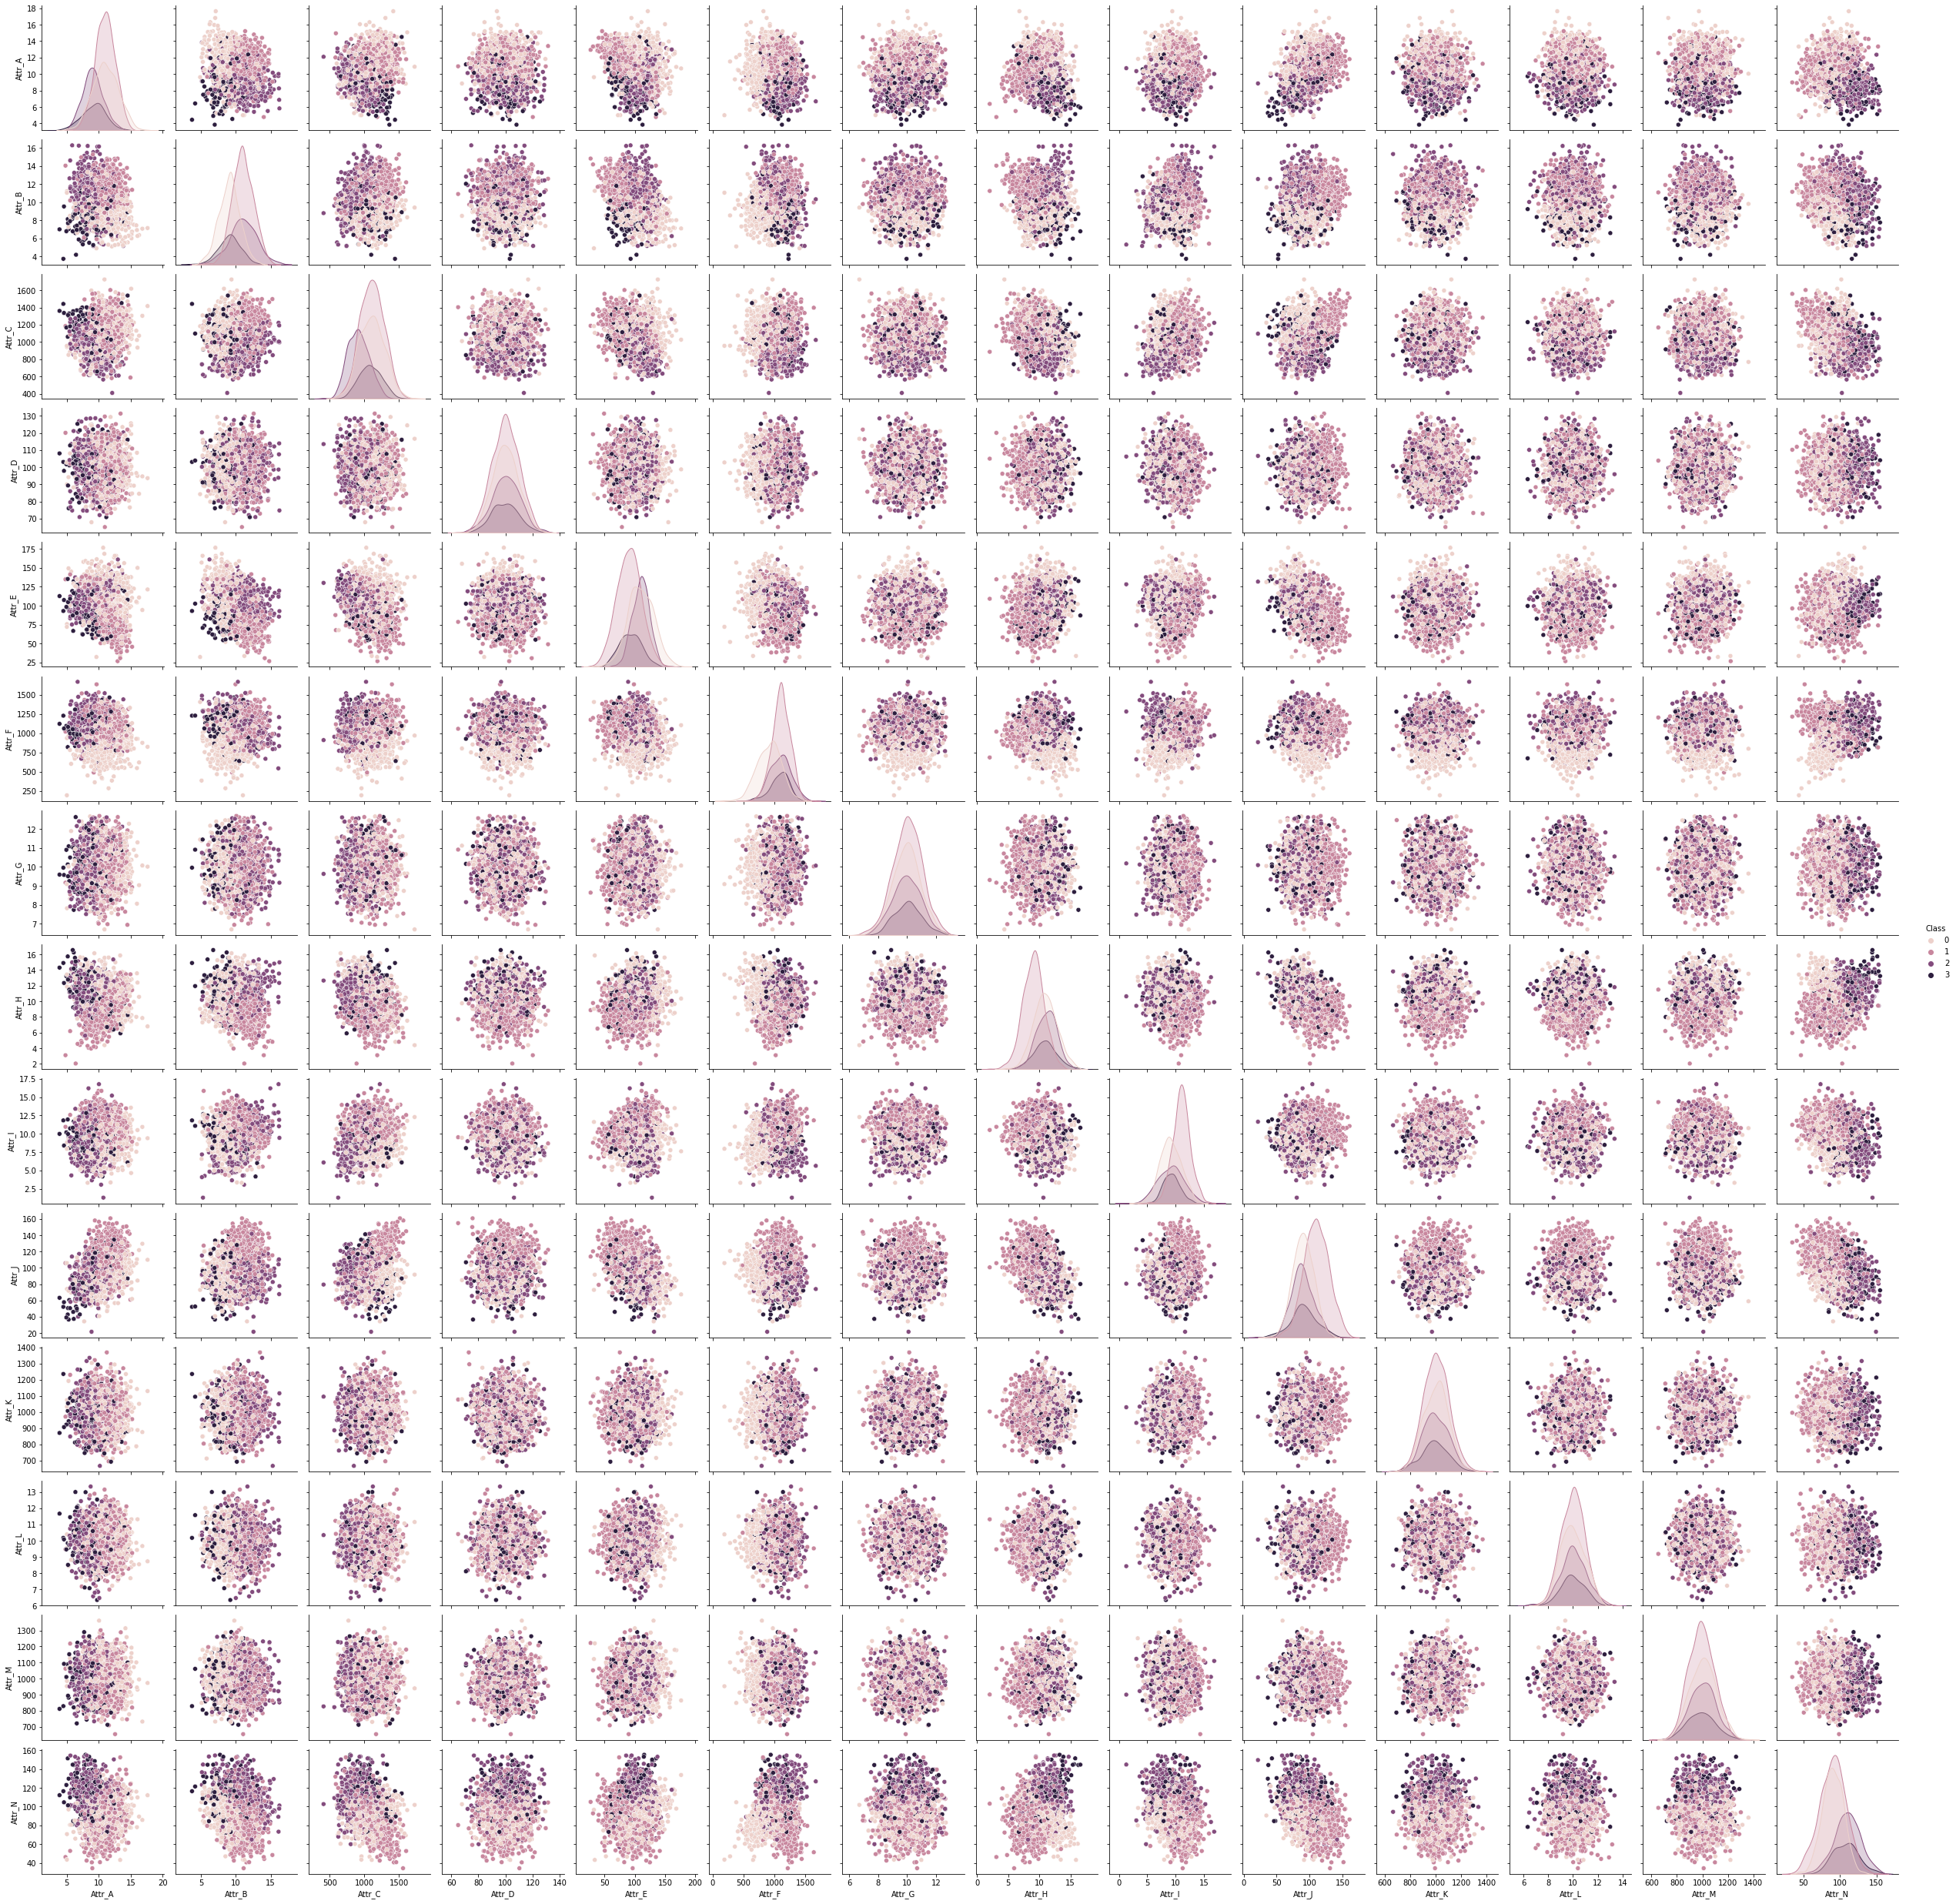

In [ ]:
import seaborn as sns
sns.pairplot( df , hue = 'Class')

In [ ]:
from math import log
def entropie(df):
  sum=0
  nb_lignes = df.shape [0] 
  series = df['Class'].value_counts()
  print(series)
  for i in series:
      sum += (i/nb_lignes)*(log(i/nb_lignes,2))
  return -sum
  

In [ ]:
entropie(df)

1    908
0    674
2    472
3    244
Name: Class, dtype: int64


1.8608867211835995

In [ ]:
df.quantile(q=0 , axis=0, numeric_only=True, interpolation='linear')
df.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')
df.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')


Attr_A      11.729266
Attr_B      11.438033
Attr_C    1193.860198
Attr_D     106.808023
Attr_E     114.762773
Attr_F    1167.670875
Attr_G      10.651835
Attr_H      11.585774
Attr_I      11.237865
Attr_J     111.385234
Attr_K    1070.034013
Attr_L      10.671019
Attr_M    1065.972456
Attr_N     108.424038
Class        2.000000
Name: 0.75, dtype: float64

In [25]:
df_columns = df.columns.values.tolist()
df_columns

['Attr_A',
 'Attr_B',
 'Attr_C',
 'Attr_D',
 'Attr_E',
 'Attr_F',
 'Attr_G',
 'Attr_H',
 'Attr_I',
 'Attr_J',
 'Attr_K',
 'Attr_L',
 'Attr_M',
 'Attr_N',
 'Class']

In [26]:
#Reseaux de neurones artificiels :

#Préparation des données
  #En effet les claases sont attribuées avec un id numérique, 
  #cela posera un problème durant l'apprentissage automatique, et c'est que le modèle peut entrainer un biais à cause de la relation d'ordre entre les differente claase
  #Pour cette raison nous avons choisi de representer les classe en un codage binaire 'one hot' vue en tp.
#Attention ce block est à executer une et une seule fois
df_columns = df.columns.values.tolist()
features = df_columns[0:13] 
X = df[features]
label = pd.get_dummies(df['Class'],prefix='Classe')
df = pd.concat([df,label],axis=1)
df.drop(['Class'], axis=1, inplace=True)


In [ ]:
df

Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
0     12.478064  14.784992  1247.541877  100.962061   52.462177  1089.398211   
1      8.264345   8.854181  1389.686814   99.526529   65.106526  1186.523399   
2      9.875571  13.292442   779.077401  123.993772  104.699796  1201.722480   
3      9.207661   9.346913   965.468523   89.176009  102.628284   743.913507   
4      8.863842  12.542969  1096.386230  106.595385  131.813380   883.059615   
...         ...        ...          ...         ...         ...          ...   
2293   8.537905   9.384823  1327.744849  105.043442  109.078735  1160.837366   
2294  10.727881  12.758686  1017.495424  103.388471   65.953337   955.265960   
2295   9.501612  12.449207   934.067397   94.681564  108.414931  1097.411669   
2296  11.581467  12.024253  1247.894013   95.732086   85.265126  1012.536672   
2297  10.970207  10.507666  1074.743064   90.878067   88.297209   873.712952   

         Attr_G     Attr_H     Attr_I      Attr_J       Attr_K     Attr_L  \
0     10.575834   8.375407  10.288159  110.746551   994.367610   9.069350   
1      9.500485  10.088058   9.371983   78.210274   943.089589   9.988919   
2      9.545266  14.266238   9.703551   86.252483  1082.989190  10.084217   
3      9.777953  11.613946   8.912059   96.727873   812.800511   8.621781   
4     10.092974  13.556029  11.649982   21.566576   971.083175  10.072271   
...         ...        ...        ...         ...          ...        ...   
2293  10.054976   6.461691   9.718114  146.371553  1057.578998   9.504676   
2294  11.040854   5.930806   9.690326   92.318732   960.311986   9.262439   
2295  11.379111  12.178924   9.161475   63.980205   972.994510   7.685836   
2296   9.972115   9.001799  11.909924  128.966934   927.437658   8.906923   
2297   8.725803  14.736636   9.540957   64.366739  1052.481370   8.576282   

           Attr_M      Attr_N  Classe_0  Classe_1  Classe_2  Classe_3  
0     1027.953917  109.672758         0         1         0         0  
1     1120.317724   83.498764         0         0         0         1  
2      970.953682   93.557046         0         0         1         0  
3      947.207195  120.890054         0         0         0         1  
4     1007.583900  149.511979         0         0         1         0  
...           ...         ...       ...       ...       ...       ...  
2293   896.830168   50.119576         0         1         0         0  
2294  1158.151512  110.854719         0         1         0         0  
2295   996.569164   89.850887         1         0         0         0  
2296   891.006210   93.561794         0         1         0         0  
2297   823.674907   69.743754         1         0         0         0  

[2298 rows x 18 columns]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, label_train, label_test = train_test_split(X, label, test_size=0.15, random_state=42)

In [28]:
df

Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
0     12.478064  14.784992  1247.541877  100.962061   52.462177  1089.398211   
1      8.264345   8.854181  1389.686814   99.526529   65.106526  1186.523399   
2      9.875571  13.292442   779.077401  123.993772  104.699796  1201.722480   
3      9.207661   9.346913   965.468523   89.176009  102.628284   743.913507   
4      8.863842  12.542969  1096.386230  106.595385  131.813380   883.059615   
...         ...        ...          ...         ...         ...          ...   
2293   8.537905   9.384823  1327.744849  105.043442  109.078735  1160.837366   
2294  10.727881  12.758686  1017.495424  103.388471   65.953337   955.265960   
2295   9.501612  12.449207   934.067397   94.681564  108.414931  1097.411669   
2296  11.581467  12.024253  1247.894013   95.732086   85.265126  1012.536672   
2297  10.970207  10.507666  1074.743064   90.878067   88.297209   873.712952   

         Attr_G     Attr_H     Attr_I      Attr_J       Attr_K     Attr_L  \
0     10.575834   8.375407  10.288159  110.746551   994.367610   9.069350   
1      9.500485  10.088058   9.371983   78.210274   943.089589   9.988919   
2      9.545266  14.266238   9.703551   86.252483  1082.989190  10.084217   
3      9.777953  11.613946   8.912059   96.727873   812.800511   8.621781   
4     10.092974  13.556029  11.649982   21.566576   971.083175  10.072271   
...         ...        ...        ...         ...          ...        ...   
2293  10.054976   6.461691   9.718114  146.371553  1057.578998   9.504676   
2294  11.040854   5.930806   9.690326   92.318732   960.311986   9.262439   
2295  11.379111  12.178924   9.161475   63.980205   972.994510   7.685836   
2296   9.972115   9.001799  11.909924  128.966934   927.437658   8.906923   
2297   8.725803  14.736636   9.540957   64.366739  1052.481370   8.576282   

           Attr_M      Attr_N  Classe_0  Classe_1  Classe_2  Classe_3  
0     1027.953917  109.672758         0         1         0         0  
1     1120.317724   83.498764         0         0         0         1  
2      970.953682   93.557046         0         0         1         0  
3      947.207195  120.890054         0         0         0         1  
4     1007.583900  149.511979         0         0         1         0  
...           ...         ...       ...       ...       ...       ...  
2293   896.830168   50.119576         0         1         0         0  
2294  1158.151512  110.854719         0         1         0         0  
2295   996.569164   89.850887         1         0         0         0  
2296   891.006210   93.561794         0         1         0         0  
2297   823.674907   69.743754         1         0         0         0  

[2298 rows x 18 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/utility.py" "utility.py"
!ls


Mounted at /content/drive
drive  sample_data  synthetic.csv  utility.py


In [ ]:
import utility as u

In [ ]:
#Class ReseauNeuronesM1 : Modele 1 de reseaux de neurones
from scipy.stats import truncnorm
import numpy as np



def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
def ReLU(x):
  data = [max(0,value) for value in x]
  return np.array(data, dtype=float)

class ReseauNeuronesM1(object):
  def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 first_hidden_node,
                 second_hidden_node,
                 thired_hidden_node,
                 activation,
                 no_of__layers,
                 weights,
                 biais,
                 learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes 
    self.no_of_hidden_nodes = no_of_hidden_nodes 
    self.first_hidden_node = first_hidden_node
    self.second_hidden_node = second_hidden_node
    self.thired_hidden_node = thired_hidden_node
    self.learning_rate = learning_rate  
    self.activation= getattr(u.Utility,activation)
    self.n_layers = len(no_of_hidden_nodes)
    self.weights = [None] * (self.no_of_hidden_nodes +1)
    self.biais = [None] * (self.no_of_hidden_nodes +1)
    self.create_weight_matrices()

  def create_weight_matrices(self, X, y):#2000 instances ? #chaque couche 14 #3 couches cachées
      self.weights[0] = numpy.random.uniform(-1.0, 1.0, (self.no_of_hidden_nodes[0],X.shape[0]))
      self.biais[0] = numpy.random.uniform(0.0, 0.0, (self.no_of_hidden_nodes[0], 1))
      for i in range(1, self.n_layers+1):
        self.weights[i] = numpy.random.uniform(-1.0, 1.0, (self.no_of_hidden_nodes[i],self.weights[i-1].shape[0]))
        self.biais[i] = numpy.random.uniform(0.0, 0.0, (self.no_of_hidden_nodes[i], 1))


  def train(self, input_vector, target_vector):
        pass # More work is needed to train the network

  #def back_propation in (self):
        
  #def forword_propagation(self):

  #def early_stopping(self):

  def run(self, input_vector):
    # Turn the input vector into a column vector:
    input_vector = np.array(input_vector, ndmin=2).T
    input_hidden = self.activation(self.weights_in_hidden @   input_vector)
    output_vector = self.activation(self.weights_hidden_out @ input_hidden)
    return output_vector 

# 2.2 R ́eseaux de neurones artificiels
# L’early stopping sera r ́ealis ́e toutes les n = 2  ́epoques d’entraˆınement et vous
#utiliserez une patience de 3.
#— Entraˆınez plusieurs mod`eles avec les architectures suivantes :
#— Avec une activation tanh : (10,8,6), (10,8,4) et (6,4)
#— Avec une activation relu : (10,8,6), (10,8,4) et (6,4)

# Initialize an instance of the class:  
simple_network = ReseauNeuronesM1(no_of_in_nodes=18, 
                               no_of_out_nodes=4, 
                               first_hidden_node=10,
                               second_hidden_node=8,
                               thired_hidden_node=6,
                               activation=u.relu(),
                               no_of__layers=3 ,
                               weights=self.weight,
                               biais= self.biais,
                               learning_rate=0.1)
# and get a result:
res=simple_network.run(df)

print(res)

In [32]:
#partie 3 - analyse des modèles 
#Sur les données de prediction de predictions.zip :
from google.colab import files
uploaded = files.upload()




Saving y_pred_DT4.csv to y_pred_DT4 (1).csv


In [33]:
import pandas as pd
import io

pred1 = pd.read_csv(io.StringIO(uploaded['y_pred_DT4.csv'].decode('utf-8')))
pred1


2
0    1
1    0
2    1
3    0
4    0
..  ..
454  0
455  1
456  0
457  0
458  0

[459 rows x 1 columns]

In [44]:
def tp(pred,df):
  res=0
  nb_lignes = df.shape [0] 

  for i in pred.index.tolist() :
    #if (pred.index[i]==df[i]):
    if ((pred[i]==0 & df[i]['Classe_0']==1) | (pred[i]==1 & df[i]['Classe_1']==1) |(pred[i]==2 & df[i]['Classe_2']==1) |(pred[i]==3 & df[i]['Classe_3']==1)):
        res+=1
  return res

tp(pred1,df)
#def fp(pred,df):
#res=0
#for i in pred && df
#if ((pred.'2'==0 && df.Classe_0==0) ||(pred.'2'==1 && df.Classe_1==0) ||(pred.'2'==2 && df.Classe_2==0) ||(pred.'2'==3 && df.Classe_3==0))
  #res++
#return res


#def fn(pred,df):
#res=0
#for i in pred && df
#if ((pred.'2'!=0 && df.Classe_0==1) ||(pred.'2'!=1 && df.Classe_1==1) ||(pred.'2'!=2 && df.Classe_2==1) ||(pred.'2'!=3 && df.Classe_3==1))
  #res++
#return res


#def exactitude(pred):#tp/tp+fp
#  tp=tp(pred,def)
#  return tp/tp+fp(pred,def)

#def recall(pred):#tp/tp+fn
#  tp=tp(pred,def)
#  return tp/tp+fn(pred,def)


KeyError: ignored